# Upper Confidence Bound

Reference for the below explanation : - 
https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html

UCB works further on the concept of epilson-greedy and optimistic intial values method.

Random exploration gives us an opportunity to try out options that we have not known much about. However, due to the randomness, it is possible we end up exploring a bad action which we have confirmed in the past (bad luck!). To avoid such inefficient exploration, one approach is to decrease the parameter ε in time and the other is to be optimistic about options with high uncertainty and thus to prefer actions for which we haven’t had a confident value estimation yet. Or in other words, we favor exploration of actions with a strong potential to have a optimal value.

he Upper Confidence Bounds (UCB) algorithm measures this potential by an upper confidence bound of the reward value, U^t(a), so that the true value is below with bound $$Q(a) \leq \hat{Q}_t(a) + \hat{U}_t(a)$$ with high probability. The upper bound U^t(a) is a function of Nt(a); a larger number of trials Nt(a) should give us a smaller bound U^t(a).

In UCB algorithm, we always select the greediest action to maximize the upper confidence bound:

$$^{UCB}_t = argmax_{a \in \mathcal{A}} \hat{Q}_t(a) + \hat{U}_t(a)$$
Now, the question is how to estimate the upper confidence bound.

$$\mathbb{P} [ \mathbb{E}[X] > \overline{X}_t + u] \leq e^{-2tu^2}$$

## Hoeffding’s Inequality

If we do not want to assign any prior knowledge on how the distribution looks like, we can get help from “Hoeffding’s Inequality” — a theorem applicable to any bounded distribution.

Let $$X_1, \dots, X_t$$ be i.i.d. (independent and identically distributed) random variables and they are all bounded by the interval [0, 1]. The sample mean is $$\overline{X}_t = \frac{1}{t}\sum_{\tau=1}^t X_\tau$$. Then for u > 0, we have:

$$\mathbb{P} [ \mathbb{E}[X] > \overline{X}_t + u] \leq e^{-2tu^2}$$
Given one target action a, let us consider:

rt(a) as the random variables,
Q(a) as the true mean,
Q^t(a) as the sample mean,
And u as the upper confidence bound, u=Ut(a)
Then we have,

$$\mathbb{P} [ Q(a) > \hat{Q}_t(a) + U_t(a)] \leq e^{-2t{U_t(a)}^2}$$
We want to pick a bound so that with high chances the true mean is blow the sample mean + the upper confidence bound. Thus e−2tUt(a)2 should be a small probability. Let’s say we are ok with a tiny threshold p:

e−2tUt(a)2=p Thus, $$e^{-2t U_t(a)^2} = p \text{  Thus, } U_t(a) = \sqrt{\frac{-\log p}{2 N_t(a)}}$$

## UCB1

One heuristic is to reduce the threshold p in time, as we want to make more confident bound estimation with more rewards observed. Set p=t−4 we get UCB1 algorithm:

$$U_t(a) = \sqrt{\frac{2 \log t}{N_t(a)}} \text{  and  }
a^{UCB1}_t = \arg\max_{a \in \mathcal{A}} Q(a) + \sqrt{\frac{2 \log t}{N_t(a)}}$$

## UCB1 code

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [7]:
class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # num samples collected so far

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

In [9]:
def ucb(mean, n, nj):
    return mean + np.sqrt(2*np.log(n) / nj)

In [11]:
def run_experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0

    # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

        # for the plot
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print(b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])

    return cumulative_average

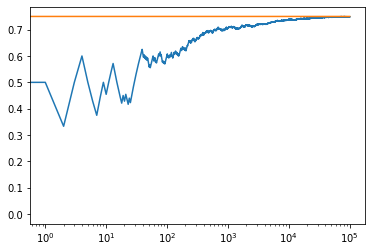

0.24418604651162795
0.5206185567010313
0.749771423404234
total reward earned: 74846.0
overall win rate: 0.74846
num times selected each bandit: [86.0, 388.0, 99529.0]


array([0.        , 0.5       , 0.33333333, ..., 0.74845497, 0.74845748,
       0.74846   ])

In [12]:
run_experiment()